In [2]:
import re
import numpy as np
import pandas as pd
import missingno as mno

In [3]:
df = pd.read_csv('geocoded.csv')
df.head()

,price,title,longitude,latitude,floor,furnishing,tenants preferred,bathroom,balcony,availability,facing,overlooking,car parking,owner resides,address,gmaps_info,coord
0,"₹ 10,000",1 BHK Builder Floor for rent in Saket,28.523548,77.208893,2 out of 4 Floors,Furnished,Bachelors/Family,2,1,Immediately,NaN,NaN,NaN,NaN,"Saket, New Delhi",[{'address_components': [{'long_name': 'Saket'...,"(28.5220971, 77.2101534)"
1,₹ 1.6 Lac,4 BHK Builder Floor for rent in Greater Kailas...,77.239797,28.550216,2 out of 3 Floors,Semi-Furnished,Bachelors/Family,4,2,Immediately,South,"Garden/Park, Main Road","1 Covered, 1 Open",NaN,"Greater Kailash 1, New Delhi",[{'address_components': [{'long_name': 'Greate...,"(28.5502164, 77.2397968)"
2,"₹ 7,000",1 BHK Builder Floor for rent in Chhattarpur,77.184825,28.495856,2 out of 3 Floors,Semi-Furnished,Bachelors/Family,1,NaN,Immediately,East,Main Road,1 Open,NaN,"Chhattarpur, New Delhi",[{'address_components': [{'long_name': 'Chhata...,"(28.4958562, 77.1848254)"
3,"₹ 20,500","1 BHK House for rent in Dayanand Colony, Lajpa...",28.562599,77.249603,Ground out of 3 Floors,Furnished,Bachelors/Family,1,1,Immediately,NaN,NaN,NaN,NaN,"Dayanand Colony, Lajpat Nagar, New Delhi",[{'address_components': [{'long_name': 'Dayana...,"(28.5625103, 77.2484181)"
4,"₹ 13,000",1 BHK Apartment for rent in Rohini Sector 18,28.741163,77.134613,2 out of 4 Floors,Semi-Furnished,Bachelors/Family,1,1,Immediately,NaN,NaN,NaN,NaN,"Rohini Sector, New Delhi",[{'address_components': [{'long_name': 'Halar ...,"(28.7018804, 77.1227164)"


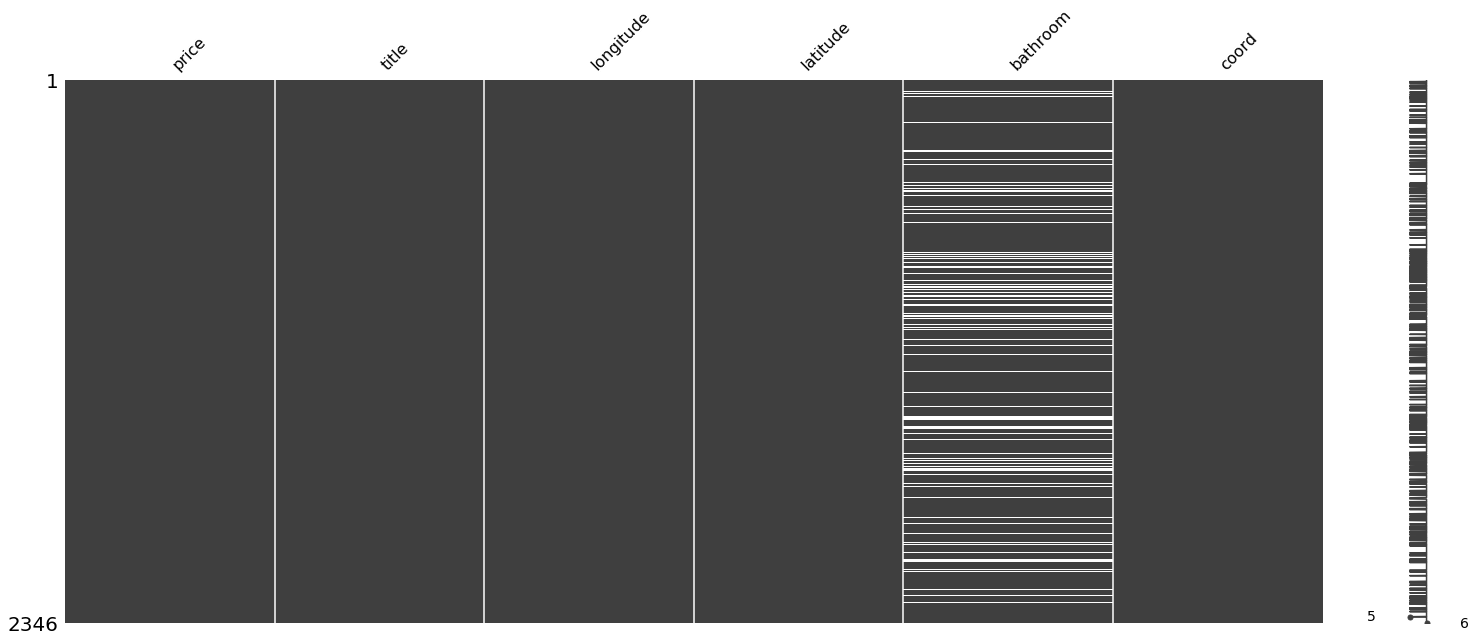

In [4]:
df.drop(columns=['tenants preferred', 'availability', 'balcony', 'furnishing',
                 'floor', 'facing', 'overlooking', 'car parking', 'owner resides',
                 'address', 'gmaps_info'], inplace=True)
mno.matrix(df);

In [5]:
def parse_price(x):
    if ',' in x: return int(re.sub(",", "", x[2:]))
    else: return np.nan
df['price'] = df['price'].apply(parse_price)

In [6]:
def parse_baths(x):
    try: return int(re.findall(r'\d+', x)[0])
    except: return np.nan
df['bathroom'] = df['bathroom'].apply(parse_baths)

In [7]:
def parse_bhk(x):
    try: return int(x.split()[0])
    except: return np.nan
df['bhk'] = df['title'].apply(parse_bhk)

In [8]:
def parse_sqft(x):
    try: return int(x.split()[-2])
    except: return np.nan
df['sqft'] = df['title'].apply(parse_sqft)

In [9]:
df.drop(columns='title', inplace=True)
df.head()

,price,longitude,latitude,bathroom,coord,bhk,sqft
0,10000.0,28.523548,77.208893,2.0,"(28.5220971, 77.2101534)",1.0,NaN
1,NaN,77.239797,28.550216,4.0,"(28.5502164, 77.2397968)",4.0,3200.0
2,7000.0,77.184825,28.495856,1.0,"(28.4958562, 77.1848254)",1.0,NaN
3,20500.0,28.562599,77.249603,1.0,"(28.5625103, 77.2484181)",1.0,NaN
4,13000.0,28.741163,77.134613,1.0,"(28.7018804, 77.1227164)",1.0,NaN


In [10]:
df.to_csv('cleaned.csv', index=False)